# Data Augmentation of Processed X-Ray Images
In this notebook, we will take the processed X-Ray images from the Pre-Processing Pipeline detailed [here](./Left%20Wrist%20X-Ray%20Image%20Pre-Processing%20Investigation.ipynb) and [here](./X-Ray%20Preprocessing%20Pipeline%20(Automated).ipynb) and use Keras to create a generator capable of yielding batches of images w/ certain augmentations. This will be done to ensure a future model does not overfit, and can handle X-Rays from different facilities that may vary in appearance, even after pre-processing.

In [1]:
# import necessary libraries
import os

import numpy as np
import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
# path for folder containing test processed x-rays
dataset_path = 'output_xrays_for_aug/xrays/'

# adds paths of all files inside of dataset folder
# excludes other folders, directories
file_paths = [ f for f in os.listdir(dataset_path) if os.path.isfile( os.path.join(dataset_path, f) ) ]
file_paths = [ os.path.join(dataset_path, f) for f in file_paths ]

file_paths

['output_xrays_for_aug/xrays/4544_PROCESSED.png',
 'output_xrays_for_aug/xrays/4370_PROCESSED.png',
 'output_xrays_for_aug/xrays/.DS_Store',
 'output_xrays_for_aug/xrays/4360_PROCESSED.png',
 'output_xrays_for_aug/xrays/1378_PROCESSED.png',
 'output_xrays_for_aug/xrays/1452_PROCESSED.png',
 'output_xrays_for_aug/xrays/4362_PROCESSED.png']

In [3]:
# creates ImageDataGenerator to be used for data augmentation
# following augmentations have been implemented:
#   -- rotation of 0 to 360 degrees
#   -- brightness from 75 to 125%
#   -- zoomed in up to 10%
#   -- horizontally flipped
#   -- vertically flipped
# removed pixels within image are filled in following patterns of nearest pixels
# accepts images in size of (batch size, height, width, channels) --> (1, 256, 256, 1)
datagen = ImageDataGenerator(rotation_range=360,
                             brightness_range=(0.75, 1.25),
                             zoom_range=0.1,
                             horizontal_flip=True,
                             vertical_flip=True,
                             fill_mode="nearest",
                             data_format = "channels_last")

In [4]:
# creates iterator for ImageDataGenerator
# reads images from directory ./output_xrays_for_aug, outputs augmented images in ./augmented_xrays as generated
# no classes i.e. no Y variable in iterator, unnecessary for unsupervised setup
# batch size of 3 for folder of 6 images
flow_iterator = datagen.flow_from_directory(directory="./output_xrays_for_aug",
                           target_size=(256,256),
                           color_mode="grayscale",
                           class_mode=None,
                           batch_size=3,
                           save_to_dir="./augmented_xrays",
                           save_format="png",
                           interpolation="nearest")

Found 6 images belonging to 1 classes.


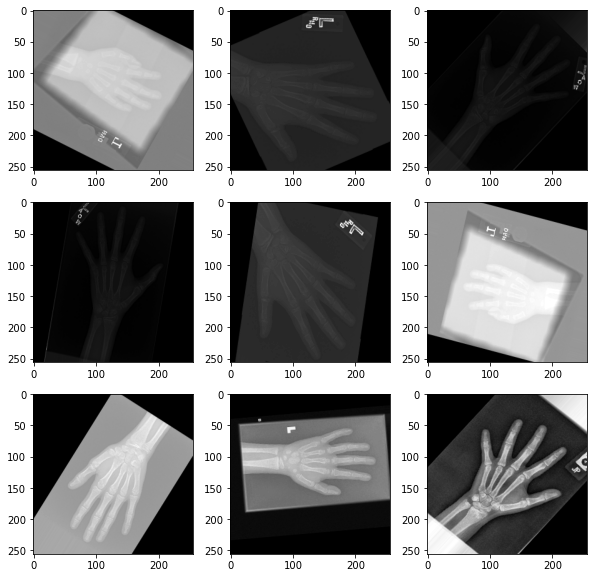

In [6]:
# plot 3 batches of 3 images
# 9 total images generated and saved to ./augmented_xrays
fig, im = plt.subplots(nrows=3, ncols=3, figsize=(10,10))

for i in range(0,3):
    imgs = next(flow_iterator)
    for j in range(0,3):
        im[i][j].imshow(imgs[j], cmap=plt.cm.gray)